### Кластерный анализ методом KMeans

##### Описание данных

Каждая строка набора данных описывает цифру (0 = линия присутствует, 1 = линия отсутствует). Линии соответствуют черточкам на экране калькулятора. 
<br> В данных 7 переменных с именами B-Н:
<br> B - top horizontal
<br> C - upper left vertical
<br> D - upper right vertical
<br> E - middle horizontal
<br> F - lower left vertical
<br> G - lower right vertical
<br> H - bottom horizontal

#### Импорт библиотек

In [66]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import accuracy_score

#### Загрузка и первичный оосмотр данных

In [67]:
df = pd.read_csv('digit.dat', sep=';')
df

,A,B,C,D,E,F,G,H,A2,B2,C2,D2,E2,F2,G2,H2
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE
496,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO
497,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO
498,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO


In [68]:
# Оставляем первые 8 столбцов, поскольку каждый столбец в таблице данных присутствует дважды
df = df.iloc[:, :8]
df

,A,B,C,D,E,F,G,H
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE
...,...,...,...,...,...,...,...,...
495,five,ONE,ONE,ZERO,ONE,ZERO,ONE,ONE
496,seven,ONE,ZERO,ONE,ONE,ONE,ONE,ZERO
497,four,ZERO,ZERO,ONE,ONE,ONE,ZERO,ZERO
498,zero,ONE,ONE,ONE,ZERO,ZERO,ONE,ZERO


In [69]:
# Удаляем пробелы и заменяем слова на цифры
df = df.map(lambda x: x.strip()).replace({'ZERO':0, 'ONE':1, 'zero':0, 'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9})
df

C:\Users\Honor\AppData\Local\Temp\ipykernel_19848\296150356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.map(lambda x: x.strip()).replace({'ZERO':0, 'ONE':1, 'zero':0, 'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9})


,A,B,C,D,E,F,G,H
0,7,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,4,0,1,1,1,0,1,0
3,2,1,1,1,1,1,0,0
4,8,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
495,5,1,1,0,1,0,1,1
496,7,1,0,1,1,1,1,0
497,4,0,0,1,1,1,0,0
498,0,1,1,1,0,0,1,0


In [70]:
# Удаляем группирующую переменную - правильная цифра
df_clear = df.drop('A', axis=1)
df_clear

,B,C,D,E,F,G,H
0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,1,1,1,0,1,0
3,1,1,1,1,1,0,0
4,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...
495,1,1,0,1,0,1,1
496,1,0,1,1,1,1,0
497,0,0,1,1,1,0,0
498,1,1,1,0,0,1,0


#### Определение количества кластеров

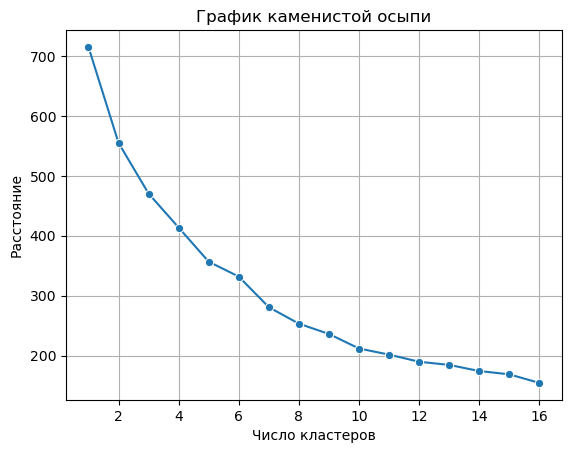

In [71]:
K = [i for i in range(1, 17)]
dist = [KMeans(n_clusters = k, random_state = 23, n_init = 10).fit(df_clear).inertia_ for k in K]
rock_line = pd.DataFrame()
rock_line['Число кластеров'] = K
rock_line['Расстояние'] = dist
sns.lineplot(data = rock_line, x = 'Число кластеров', y = 'Расстояние', markers = True, marker = 'o').set_title('График каменистой осыпи')
plt.grid(True)
plt.show()

#### Кластеризация

##### Разбиение на 10 кластеров

In [72]:
# Обучим модель
model = KMeans(n_clusters = 10, random_state = 23, n_init = 10)
model.fit(df_clear)

# Добавим в исходные данные столбец 'кластер'
df['cluster'] = model.labels_

# Выведем описательные статистики для каждого кластера
df.groupby('cluster').mean().iloc[:,1:]

,B,C,D,E,F,G,H
cluster,,,,,,,
0,0.884615,0.000000,0.807692,0.980769,0.000000,0.865385,1.000000
1,0.871429,1.000000,1.000000,0.942857,0.000000,0.928571,0.842857
2,0.852459,0.918033,0.000000,0.885246,1.000000,0.852459,0.803279
3,0.000000,0.000000,0.894737,0.000000,0.236842,0.894737,0.157895
4,0.918919,0.918919,1.000000,0.000000,1.000000,0.891892,0.918919
5,0.857143,0.000000,0.877551,0.938776,1.000000,0.204082,0.877551
6,0.877551,1.000000,0.000000,0.959184,0.000000,0.959184,0.918367
7,0.000000,0.840909,0.931818,0.909091,0.090909,0.886364,0.000000
8,0.936170,1.000000,1.000000,1.000000,1.000000,0.893617,0.914894


In [73]:
# Интерпретируем, полученнеы результаты с помощью столбца, содержащего правильные цифры
pd.DataFrame(df.groupby(['cluster'])['A'].value_counts())

count
cluster A       
0       3     31
        9     10
        2      5
        1      1
        4      1
        5      1
        6      1
        7      1
        8      1
1       9     38
        4      9
        8      8
        5      6
        3      5
        0      3
        7      1
2       6     46
        8      5
        5      4
        4      3
        0      1
        2      1
        9      1
3       1     33
        7      5
4       0     32
        8      2
        2      1
        3      1
        9      1
5       2     34
        3      7
        0      2
        4      2
        7      2
        8      1
        9      1
6       5     41
        9      3
        3      2
        6      2
        8      1
7       4     37
        1      5
        7      1
        8      1
8       8     39
        0      2
        2      2
        5      2
        6      1
        9      1
9       7     38
        3      9
        1      4
        0      2

<br> Кластер 0: цифра 3 
<br> Кластер 1: цифра 9
<br> Кластер 2: цифра 6
<br> Кластер 3: цифра 1
<br> Кластер 4: цифра 0
<br> Кластер 5: цифра 2
<br> Кластер 6: цифра 5
<br> Кластер 7: цифра 4
<br> Кластер 8: цифра 8
<br> Кластер 9: цифра 7

In [74]:
df['cluster'] = df.cluster.replace({0:3, 1:9, 2:6, 3:1, 4:0, 5:2, 6:5, 7:4, 8:8, 9:7})
accuracy_score(df.A, df.cluster)

0.738

#### Выводы

Модель хорошо интепретируема. При разбиении на 10 кластеров каждому кластеру однозначно сопоставляется одна цифра - та, представителей которой в кластере большинство. Точность составляет 74%, что является неплохим результатом. 